# Speed distribution

## Import libraries, data and plot details

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.collections
from matplotlib import rc
import os
import sys
sys.path.append("../")

from scipy import stats
from scipy.optimize import curve_fit
from scipy.linalg import norm

from config import results_folder, plots_folder, init_folder

In [2]:
plt.style.use('bmh')
%matplotlib inline
plt.rcParams['figure.autolayout'] = False
plt.rcParams['figure.figsize'] = 10, 4
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['font.size'] = 12
plt.rcParams['lines.linewidth'] = 2.0
plt.rcParams['lines.markersize'] = 8
plt.rcParams['legend.fontsize'] = 14

matplotlib.rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
matplotlib.rc('text', usetex=True)
matplotlib.rcParams['text.latex.preamble']=[r"\usepackage{amsmath} \usepackage{bm}"]

## Utility functions

In [3]:
def boltzmann_distribution_2D(v, kT, m):
    return (m/kT)*v*np.exp(-m*v**2/(2*kT))

def boltzmann_distribution_3D(v, kT, m):
    return (m/(2*kT*np.pi))**(3/2)*4*np.pi*v**2*np.exp(-m*v**2/(2*kT))

def average_histogram(eq_speeds, number_of_runs, number_of_bins, m):
    hist_matrix = np.zeros((number_of_runs, number_of_bins))
    for i in range(number_of_runs):
        hist_matrix[i, :], bin_edges = np.histogram(eq_speeds[i, :], bins=number_of_bins, range=(0, 4), density=True)
    hist_matrix = np.average(hist_matrix, axis=0)
    return hist_matrix, bin_edges

def compute_kT_3d(eq_speeds, m):
    kT = np.mean(eq_speeds**2)*m/3
    return kT

def compute_kT_2d(eq_speeds, m):
    kT = np.mean(eq_speeds**2)*m/2
    return kT

def v_avg_2d(kT_2d):
    return np.sqrt(kT_2d*np.pi/2)

def v_square_avg_2d(kT_2d):
    return 2*kT_2d

def sigma_2d(kT_2d):
    return np.sqrt(kT_2d*(4-np.pi)/2)

def v_avg_3d(kT_3d):
    return np.sqrt(kT_3d*8/np.pi)

def v_square_avg_3d(kT_3d):
    return 3*kT_3d

def sigma_3d(kT_3d):
    return np.sqrt(kT_3d*(3*np.pi-8)/np.pi)

def rel_error(theoretical_value, computed_value):
    return np.abs((theoretical_value-computed_value)/(theoretical_value))

## 2D

In [4]:
N = 2000
r = 0.005
number_of_runs = 20
number_of_bins = 140
stopping_criterion = 0.2*N

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


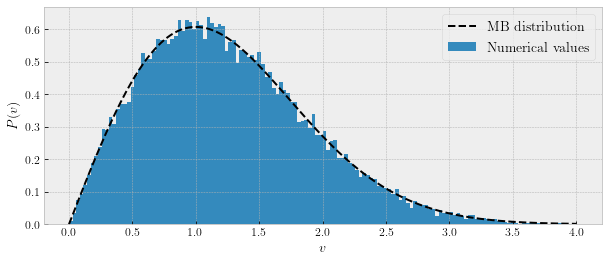

In [5]:
eq_speeds = np.zeros((number_of_runs, N))
for i in range(number_of_runs):
    energy_matrix = np.load(file=os.path.join(results_folder, f'speed_distribution_2d/eq_state_speed_distribution_2d_N_{N}_{i}.npy'))
    eq_speeds[i, :] = energy_matrix[:, 1]

kT_2d = compute_kT_2d(eq_speeds, 1)

v = np.linspace(0, 4, 1000)

# average over multiple runs to achieve smoother distributions
hist_plot, bin_edges = average_histogram(eq_speeds, number_of_runs, number_of_bins, 1)

#plt.figure(figsize=(15, 7))
plt.figure()
#plt.grid()
plt.bar(bin_edges[:-1], hist_plot, width=4/number_of_bins, align='edge', label='Numerical values')
plt.plot(v, boltzmann_distribution_2D(v, kT_2d, 1), 'k--', label='MB distribution')
plt.xlabel(r'$v$')
plt.ylabel(r'$P(v)$')
#plt.title(r'Speed distribution in equilibrium for $N=2000$ equal particles in 2D')
plt.legend()
plt.savefig(os.path.join(plots_folder, f'speed_distribution_2D_N_{N}_rad_{r}.pdf'))
plt.show()

In [6]:
print(r'$\langle v \rangle$')
avg_v_2d = v_avg_2d(kT_2d)
mean_v_2d = np.mean(eq_speeds)
print(avg_v_2d)
print(mean_v_2d)
print(f'Rel error: {np.round(rel_error(avg_v_2d, mean_v_2d)*100, decimals=2)} %')
print(r'$\langle v^2 \rangle$')
avg_v_square_2d = v_square_avg_2d(kT_2d)
mean_v_square_2d = np.mean(eq_speeds**2)
print(avg_v_square_2d)
print(mean_v_square_2d)
print(f'Rel error: {np.round(rel_error(avg_v_square_2d, mean_v_square_2d)*100, decimals=2)} %')
print(r'$\sigma$')
std_2d = sigma_2d(kT_2d)
computed_sigma_2d = np.std(eq_speeds)
print(std_2d)
print(computed_sigma_2d)
print(f'Rel error: {np.round(rel_error(std_2d, computed_sigma_2d)*100, decimals=2)} %')

$\langle v \rangle$
1.2533141373155314
1.2543650327415545
Rel error: 0.08 %
$\langle v^2 \rangle$
2.0000000000000995
2.0000000000000995
Rel error: 0.0 %
$\sigma$
0.6551363775620499
0.653122013589634
Rel error: 0.31 %


## 3D

In [7]:
N = 1000
r = 1/40
number_of_runs = 20
number_of_bins = 140
stopping_criterion = 0.2*N

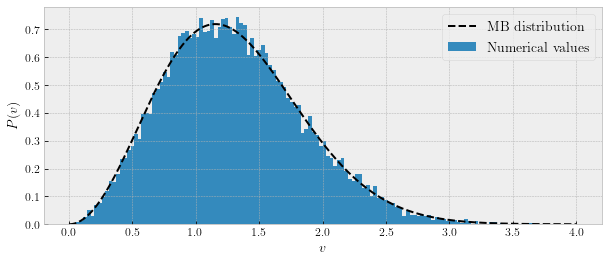

In [8]:
eq_speeds = np.zeros((number_of_runs, N))
for i in range(number_of_runs):
    energy_matrix = np.load(file=os.path.join(results_folder, f'speed_distribution_3d/eq_state_speed_distribution_3d_N_{N}_{i}.npy'))
    eq_speeds[i, :] = energy_matrix[:, 1]

kT_3d = compute_kT_3d(eq_speeds, 1)

v = np.linspace(0, 4, 1000)

initial_velocities = np.load(file=os.path.join(init_folder, f'eq_velocity_N_{N}_rad_{r}_3d.npy'))
initial_speeds = norm(initial_velocities, axis=1)

# average over multiple runs to achieve smoother distributions
hist_plot, bin_edges = average_histogram(eq_speeds, number_of_runs, number_of_bins, 1)

#plt.figure(figsize=(15, 7))
plt.figure()
#plt.grid()
plt.bar(bin_edges[:-1], hist_plot, width=4/number_of_bins, align='edge', label='Numerical values')
#plt.hist(initial_speeds, density=True, width=4/number_of_bins, bins=number_of_bins, range=(0,4), color='green', label='Init')
plt.plot(v, boltzmann_distribution_3D(v, kT_3d, 1), 'k--', label='MB distribution')
plt.xlabel(r'$v$')
plt.ylabel(r'$P(v)$')
#plt.title(r'Speed distribution in equilibrium for $N=1000$ equal particles in 3D')
plt.legend()
plt.savefig(os.path.join(plots_folder, f'speed_distribution_3D_N_{N}_rad_{r}.pdf'))
plt.show()

In [9]:
print(r'$\langle v \rangle$')
avg_v_3d = v_avg_3d(kT_3d)
mean_v_3d = np.mean(eq_speeds)
print(avg_v_3d)
print(mean_v_3d)
print(f'Rel error: {np.round(rel_error(avg_v_3d, mean_v_3d)*100, decimals=2)} %')
print(r'$\langle v^2 \rangle$')
avg_v_square_3d = v_square_avg_3d(kT_3d)
mean_v_square_3d = np.mean(eq_speeds**2)
print(avg_v_square_3d)
print(mean_v_square_3d)
print(f'Rel error: {np.round(rel_error(avg_v_square_3d, mean_v_square_3d)*100, decimals=2)} %')
print(r'$\sigma$')
std_3d = sigma_3d(kT_3d)
computed_sigma_3d = np.std(eq_speeds)
print(std_3d)
print(computed_sigma_3d)
print(f'Rel error: {np.round(rel_error(std_3d, computed_sigma_3d)*100, decimals=2)} %')

$\langle v \rangle$
1.3029400317411255
1.305208128760408
Rel error: 0.17 %
$\langle v^2 \rangle$
2.0000000000000173
2.0000000000000173
Rel error: 0.0 %
$\sigma$
0.5498611403676862
0.5444554532905069
Rel error: 0.98 %


## Intial values for speed

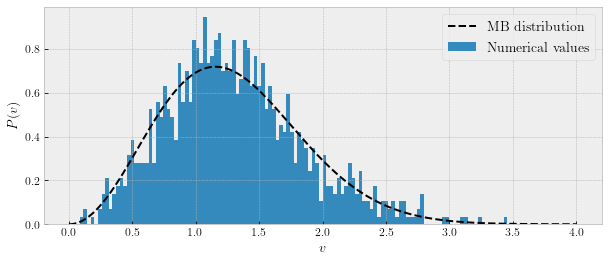

In [10]:
initial_velocities = np.load(file=os.path.join(init_folder, f"eq_velocity_N_{N}_rad_{r}_3d.npy"))
initial_speeds = norm(initial_velocities, axis=1)

plt.figure()
plt.hist(initial_speeds, density=True, width=4/number_of_bins, bins=number_of_bins, range=(0,4), label='Numerical values')
plt.plot(v, boltzmann_distribution_3D(v, kT_3d, 1), 'k--', label='MB distribution')
plt.xlabel(r'$v$')
plt.ylabel(r'$P(v)$')
# plt.title(r'Initial speed distribution for $N=1000$ equal particles in 3D')
plt.legend()
plt.savefig(os.path.join(plots_folder, f'initial_speed_distribution_3D_N_{N}_rad_{r}.pdf'))
plt.show()

In [11]:
print(r'$\langle v \rangle$')
print(v_avg_3d(kT_3d))
print(np.mean(initial_speeds))
print(r'$\langle v^2 \rangle$')
print(v_square_avg_3d(kT_3d))
print(np.mean(initial_speeds**2))
print(r'$\sigma$')
print(sigma_3d(kT_3d))
print(np.std(initial_speeds))

$\langle v \rangle$
1.3029400317411255
1.3063746012227802
$\langle v^2 \rangle$
2.0000000000000173
2.0000000000000746
$\sigma$
0.5498611403676862
0.54165062658516


In [12]:
rel_error(0.451, 0.420)

0.06873614190687367

## How to create a referance frame where only the dyanmics determine the MSD?

In [13]:
print(initial_velocities.shape)

(1000, 3)


In [14]:
E0_all = 0.5 * np.sum(initial_velocities*initial_velocities, axis=1)
mean_E0 = np.mean(E0_all)

In [15]:
mean_v_along_each_axis = np.mean(initial_velocities, axis=0)

In [16]:
mean_v_along_each_axis

array([0.00482408, 0.0181438 , 0.02314435])

In [17]:
adjust_velocities = initial_velocities - mean_v_along_each_axis
E0_all = 0.5 * np.sum(adjust_velocities*adjust_velocities, axis=1)
mean_E0_adjusted = np.mean(E0_all)

In [18]:
print(mean_E0, mean_E0_adjusted)

1.0000000000000373 0.9995559349574223


In [19]:
print(mean_E0-mean_E0_adjusted)

0.0004440650426149606
